## Decision Tree and Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [4]:
df.shape

(303, 14)

#### Data Pre - processing

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
# no null values or categorical columns

In [9]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [10]:
# Separating input and output
X = df.drop('output',axis=1)
y=df['output']

In [11]:
# Scaling the input features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Model Implementation

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape , x_test.shape

((242, 13), (61, 13))

In [15]:
#Decision Tree Classifier
DT_model = DecisionTreeClassifier()

In [16]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
DT_model.score(x_train,y_train)

1.0

In [18]:
dt_pred=DT_model.predict(x_test)

In [19]:
# Random Forest Classifier
RF_model = RandomForestClassifier()

In [20]:
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
rf_pred = RF_model.predict(x_test)

#### Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
eval = pd.DataFrame(columns=['Model','Accuracy'],data=[['Decision Tree' , dt_acc],['Random Forest' , rf_acc]])
eval

,Model,Accuracy
0,Decision Tree,0.737705
1,Random Forest,0.868852


In [24]:
print("Decision Tree Classifier :\n",classification_report(y_test , dt_pred))

Decision Tree Classifier :
               precision    recall  f1-score   support

           0       0.67      0.81      0.73        27
           1       0.82      0.68      0.74        34

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.75      0.74      0.74        61



In [25]:
print("Random Forest Classifier :\n",classification_report(y_test , rf_pred))

Random Forest Classifier :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Text(847.0858585858584, 0.5, 'Actual')

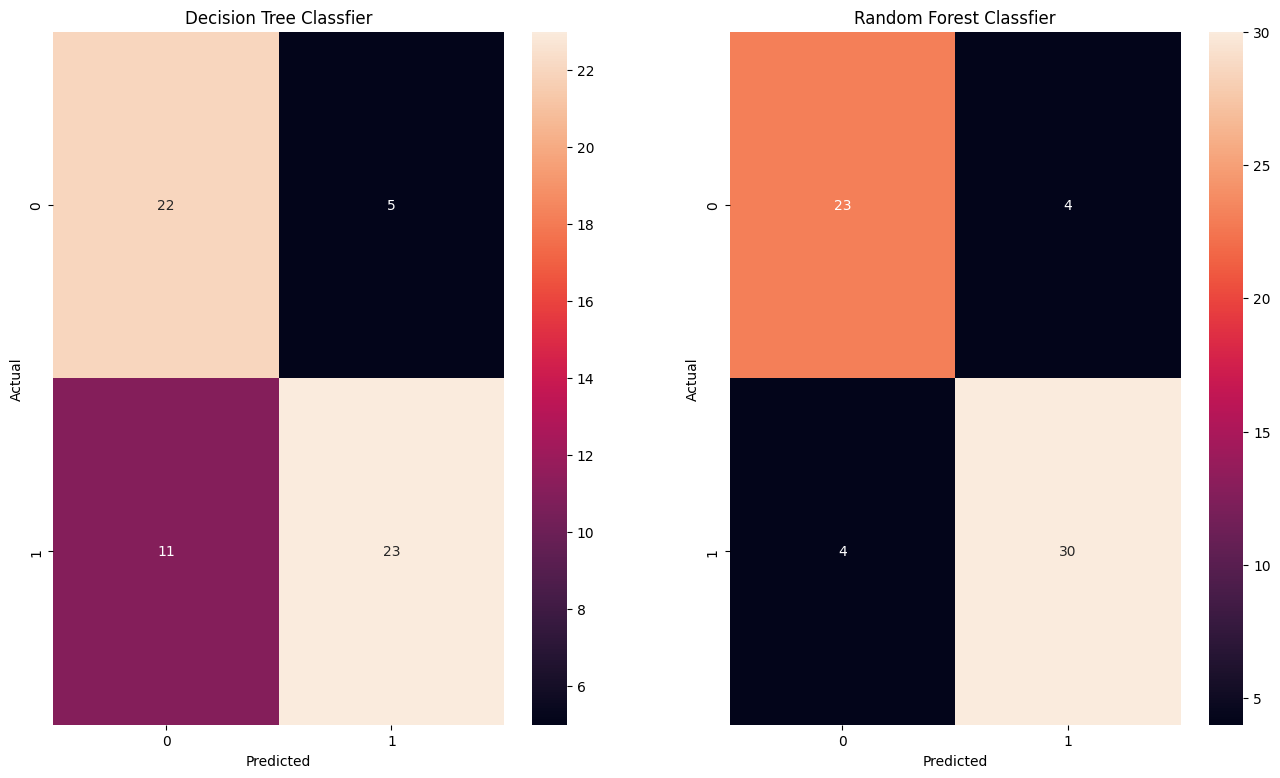

In [26]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Decision Tree Classfier")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
plt.title("Random Forest Classfier")
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [39]:
tuned_rf_model = RandomForestClassifier(n_estimators=150)

In [40]:
tuned_rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [41]:
tunedrf_pred = tuned_rf_model.predict(x_test)

In [42]:
print("Random Forest Classifier :\n",classification_report(y_test , tunedrf_pred))

Random Forest Classifier :
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



Text(170.72222222222223, 0.5, 'Actual')

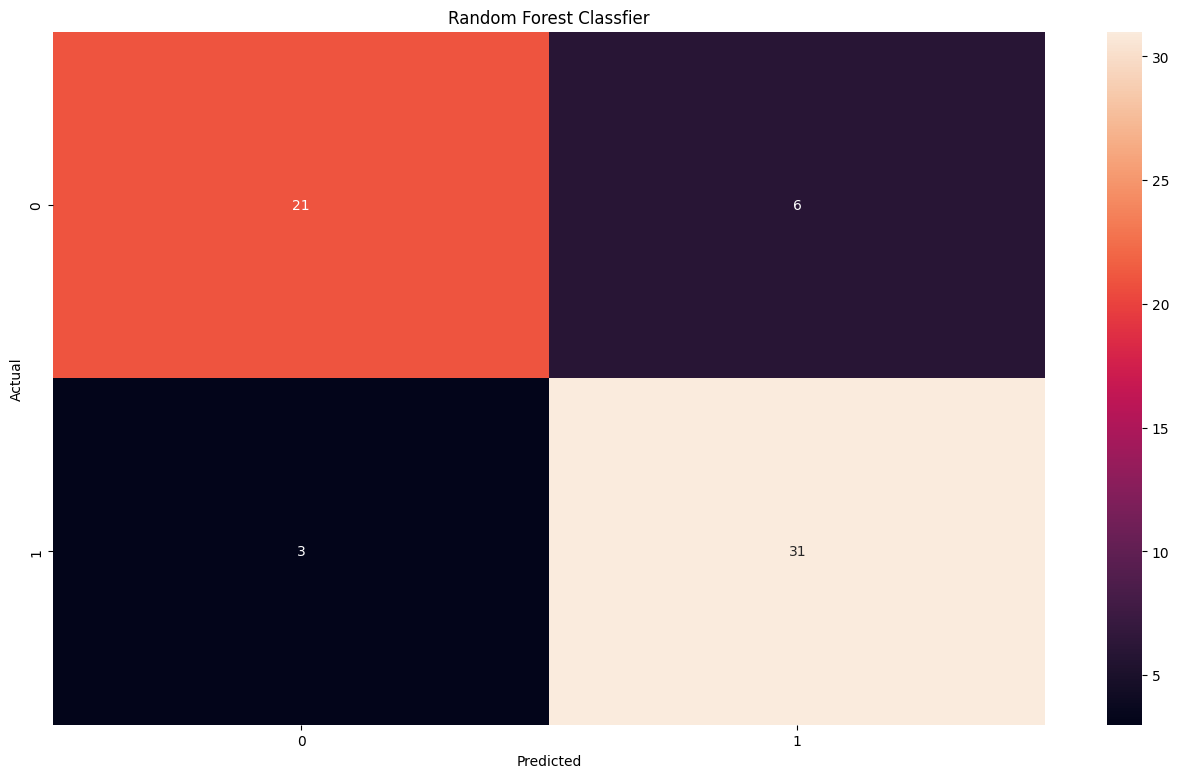

In [43]:
plt.figure(figsize=(16,9))
plt.title("Random Forest Classfier")
sns.heatmap(confusion_matrix(y_test,tunedrf_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [44]:
print(accuracy_score(y_test,tunedrf_pred))

0.8524590163934426
